In [89]:
import math 
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import seaborn as sns

###### All in MKS
E [kWh]
DL [kg/m2]
PL [kg/kW]


In [103]:
g=9.81
rho=1.18
PAX=4
Range=200
Prop_Blade=4
Prop_Diam=2
L_D=11

$$ E = E_{capacityFade}+E_{empty}+E_{cruize}+E_{hover}+E_{reserve} $$
$$ Range = E_{cruize}.\eta_{elec}.\frac{L}{D}.\frac{1}{g}.\frac{m_{bat}}{m_{tot}} $$

$$ PL = FM*\sqrt{\frac{2*\rho}{DL}} $$

$$ m_{tot} = m_{bat} +m_{empty} +m_{payload} $$
$$ m_{tot} = m_{bat} +k_{empty}.m_{tot} +m_{payload} $$

In [104]:
def eRange(E,L_D,mBat,mTot):
    eta=0.9
    Range=E*eta*1/g*L_D*mBat/mTot
    return Range
def PowerLoading(FM,DL):
    PL=FM*math.sqrt(2*rho/DL)
    return PL

In [105]:
eRange(300,L_D,1000,3000)

100.91743119266054

In [106]:
#Archer
Energy={'Fade':28,'Hover':26,'Cruize':80,'Reserve':37,'Empty':16}
Energy_df=pd.DataFrame(Energy,index=['Archer'])

In [107]:
#Archer
Energy={'Fade':28,'Hover':26,'Cruize':80,'Reserve':37,'Empty':16}

In [108]:
Energy_df

,Fade,Hover,Cruize,Reserve,Empty
Archer,28,26,80,37,16


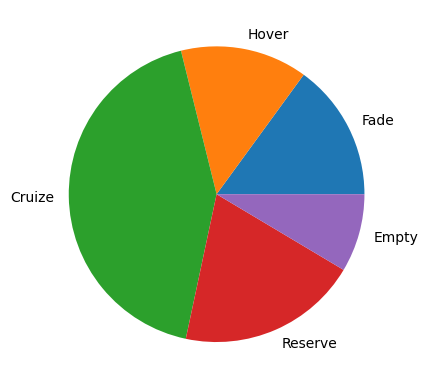

In [159]:
plt.pie(Energy_df.loc['Archer'].values,labels=np.array(Energy_df.columns))
plt.show()

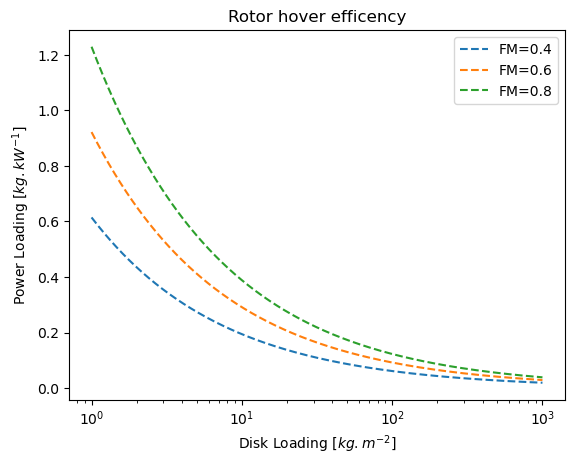

In [163]:
x0=np.linspace(1,1000,1000000)
func=np.vectorize(PowerLoading)
y0=func(0.4,x0)
y1=func(0.6,x0)
y2=func(0.8,x0)

f0 = interp1d(x0, y0, kind='quadratic')
f1 = interp1d(x0, y1, kind='quadratic')
f2 = interp1d(x0, y2, kind='quadratic')

plt.plot(x0 , f0(x0), '--', x0 , f1(x0) , '--', x0, f2(x0), '--')
plt.legend(['FM=0.4','FM=0.6','FM=0.8'], loc='best')
plt.xlabel(r'Disk Loading [$kg.m^{-2}$]')
plt.ylabel(r'Power Loading [$kg.kW^{-1}$]')
plt.xscale("log")
plt.title('Rotor hover efficency')
plt.show()

In [ ]:
#Plot for each direction total time function of start time
sns.scatterplot(x=test['start'],y=test['total_time'],hue=test['direction_id'],palette='YlGnBu')